Imports + Display Settings 

In [47]:
## Imports

import pandas as pd
import numpy as np 
from pathlib import Path
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from statsbombpy import sb
import seaborn as sns
import matplotlib.patches as mpatches

In [48]:
pd.options.display.max_columns = 200


Load Euro 2025 Matches & Events 

In [49]:
comps = sb.competitions()
comps.sort_values(['competition_name','season_name']).tail(30)

competition_id  season_id               country_name  \
48              11         22                      Spain   
47              11         23                      Spain   
46              11         24                      Spain   
45              11         25                      Spain   
44              11         26                      Spain   
43              11         27                      Spain   
42              11          2                      Spain   
41              11          1                      Spain   
40              11          4                      Spain   
39              11         42                      Spain   
38              11         90                      Spain   
57              81        275                  Argentina   
56              81         48                  Argentina   
60               7         27                     France   
59               7        108                     France   
58               7        235                     France   
61              44        107   United States of America   
63              49          3   United States of America   
62             116         68  North and Central America   
65               2         44                    England   
64               2         27                    England   
67              12         86                      Italy   
66              12         27                      Italy   
69              55         43                     Europe   
68              55        282                     Europe   
70              35         75                     Europe   
72              53        106                     Europe   
71              53        315                     Europe   
74              72         30              International   
73              72        107              International   

         competition_name competition_gender  competition_youth  \
48                La Liga               male              False   
47                La Liga               male              False   
46                La Liga               male              False   
45                La Liga               male              False   
44                La Liga               male              False   
43                La Liga               male              False   
42                La Liga               male              False   
41                La Liga               male              False   
40                La Liga               male              False   
39                La Liga               male              False   
38                La Liga               male              False   
57       Liga Profesional               male              False   
56       Liga Profesional               male              False   
60                Ligue 1               male              False   
59                Ligue 1               male              False   
58                Ligue 1               male              False   
61    Major League Soccer               male              False   
63                   NWSL             female              False   
62  North American League               male              False   
65         Premier League               male              False   
64         Premier League               male              False   
67                Serie A               male              False   
66                Serie A               male              False   
69              UEFA Euro               male              False   
68              UEFA Euro               male              False   
70     UEFA Europa League               male              False   
72      UEFA Women's Euro             female              False   
71      UEFA Women's Euro             female              False   
74      Women's World Cup             female              False   
73      Women's World Cup             female              False   

    competition_international season_name               match_upd

In [50]:
print("Matches loaded:", len(matches))
print(matches[['match_id','home_team','away_team']].head(10))

Matches loaded: 31
   match_id            home_team            away_team
0   4020846      England Women's        Spain Women's
1   4020077      Germany Women's        Spain Women's
2   4020005      England Women's        Italy Women's
3   4018357       France Women's      Germany Women's
4   4018356        Spain Women's  Switzerland Women's
5   4018355       Sweden Women's      England Women's
6   4018354       Norway Women's        Italy Women's
7   3998858      England Women's                Wales
8   3998859  Netherlands Women's       France Women's
9   3998857       Poland Women's      Denmark Women's


In [51]:
## Getting Euro2025 from dataset 

comp_id = 53
season_id = 315 

matches = sb.matches(competition_id = comp_id, season_id = season_id)
## Getting all matches from dataset not just one 
events_list = []
for i, row in matches.iterrows():
    match_id = int(row.match_id)
    try:
        e = sb.events(match_id=match_id)
        e['match_id'] = match_id
        events_list.append(e)
    except Exception as ex:
        print(f"Error")
events = pd.concat(events_list, ignore_index=True)
print("Loaded Match:", match_id, "| Rows:", len(events))

Loaded Match: 3998841 | Rows: 105611


In [53]:
print("Total columns:", len(events.columns))
list(events.columns)


Total columns: 113


['50_50',
 'ball_receipt_outcome',
 'ball_recovery_recovery_failure',
 'carry_end_location',
 'clearance_aerial_won',
 'clearance_body_part',
 'clearance_head',
 'clearance_left_foot',
 'clearance_other',
 'clearance_right_foot',
 'counterpress',
 'dribble_nutmeg',
 'dribble_outcome',
 'duel_outcome',
 'duel_type',
 'duration',
 'foul_committed_advantage',
 'foul_committed_card',
 'foul_won_advantage',
 'foul_won_defensive',
 'goalkeeper_body_part',
 'goalkeeper_end_location',
 'goalkeeper_outcome',
 'goalkeeper_position',
 'goalkeeper_technique',
 'goalkeeper_type',
 'id',
 'index',
 'injury_stoppage_in_chain',
 'interception_outcome',
 'location',
 'match_id',
 'minute',
 'miscontrol_aerial_won',
 'off_camera',
 'out',
 'pass_aerial_won',
 'pass_angle',
 'pass_assisted_shot_id',
 'pass_body_part',
 'pass_cross',
 'pass_cut_back',
 'pass_deflected',
 'pass_end_location',
 'pass_goal_assist',
 'pass_height',
 'pass_inswinging',
 'pass_length',
 'pass_outcome',
 'pass_outswinging',
 'pa

Clean Null Values Up 

In [54]:
null_percent = (events.isnull().mean() * 100).round(2)
null_percent[null_percent > 0].sort_values(ascending=False).head(20)

shot_follows_dribble                100.00
goalkeeper_penalty_saved_to_post    100.00
pass_miscommunication               100.00
shot_saved_off_target               100.00
ball_recovery_offensive             100.00
goalkeeper_shot_saved_off_target    100.00
shot_redirect                       100.00
goalkeeper_lost_out                 100.00
goalkeeper_shot_saved_to_post        99.99
goalkeeper_punched_out               99.99
pass_no_touch                        99.99
shot_deflected                       99.99
bad_behaviour_card                   99.99
shot_open_goal                       99.99
foul_won_penalty                     99.99
foul_committed_penalty               99.99
shot_saved_to_post                   99.99
dribble_no_touch                     99.99
block_save_block                     99.99
clearance_other                      99.99
dtype: float64

In [55]:
mostly_null = null_percent[null_percent >= 90]
print("Columns with ≥90% null values:")
print(mostly_null)


Columns with ≥90% null values:
50_50                              99.78
ball_receipt_outcome               97.98
ball_recovery_recovery_failure     99.70
clearance_aerial_won               99.82
clearance_body_part                98.79
                                   ...  
shot_open_goal                     99.99
shot_saved_to_post                 99.99
shot_redirect                     100.00
goalkeeper_lost_out               100.00
shot_follows_dribble              100.00
Length: 84, dtype: float64


In [56]:
events_clean = events.drop(columns=mostly_null.index)
print("Remaining columns:", len(events_clean.columns))

Remaining columns: 29


In [57]:
print(events_clean.columns)

Index(['carry_end_location', 'duration', 'id', 'index', 'location', 'match_id',
       'minute', 'pass_angle', 'pass_body_part', 'pass_end_location',
       'pass_height', 'pass_length', 'pass_recipient', 'pass_recipient_id',
       'period', 'play_pattern', 'player', 'player_id', 'position',
       'possession', 'possession_team', 'possession_team_id', 'related_events',
       'second', 'team', 'team_id', 'timestamp', 'type', 'under_pressure'],
      dtype='object')


Extract X/Y Cords 

In [58]:
def get_cords(loc):
    if isinstance(loc, list) and len(loc) >=2:
        return loc[0], loc[1]
    return None, None


In [ ]:
Clean Up Unnecessary Columns  

In [72]:
events_clean['x'], events_clean['y'] = zip (*events_clean['location'].apply(get_cords))
print(events_clean[['type', 'team', 'x', 'y']].head(10))

          type             team   x   y
0  Starting XI  England Women's NaN NaN
1  Starting XI    Spain Women's NaN NaN
2   Half Start  England Women's NaN NaN
3   Half Start    Spain Women's NaN NaN
4   Half Start  England Women's NaN NaN
5   Half Start    Spain Women's NaN NaN
6   Half Start  England Women's NaN NaN
7   Half Start    Spain Women's NaN NaN
8   Half Start  England Women's NaN NaN
9   Half Start    Spain Women's NaN NaN


In [61]:
## Clean 'Type' in events_clean to get only events that have cords (get rid of starting, half time, subs) 

events_clean['type'].value_counts()

type
Pass                 29108
Ball Receipt*        24646
Carry                22960
Pressure             11784
Ball Recovery         3512
Duel                  2070
Block                 1494
Clearance             1280
Goal Keeper           1184
Miscontrol             946
Dribble                942
Shot                   912
Dispossessed           812
Foul Committed         721
Foul Won               681
Interception           516
Dribbled Past          486
Substitution           289
50/50                  228
Injury Stoppage        226
Half Start             150
Half End               150
Tactical Shift         126
Referee Ball-Drop      102
Starting XI             62
Player Off              56
Player On               56
Shield                  50
Error                   28
Offside                 17
Bad Behaviour           11
Own Goal For             3
Own Goal Against         3
Name: count, dtype: int64

In [62]:
off_field_types =[
    "Starting XI",
    "Half Start",
    "Half End",
    "Substitution",
    "Tactical Shift",
    "Referee Ball-Drop",
    "Injury Stoppage"
]

events_play = events_clean[~events_clean['type'].isin(off_field_types)].copy()
events_play['type'].value_counts()

type
Pass                29108
Ball Receipt*       24646
Carry               22960
Pressure            11784
Ball Recovery        3512
Duel                 2070
Block                1494
Clearance            1280
Goal Keeper          1184
Miscontrol            946
Dribble               942
Shot                  912
Dispossessed          812
Foul Committed        721
Foul Won              681
Interception          516
Dribbled Past         486
50/50                 228
Player Off             56
Player On              56
Shield                 50
Error                  28
Offside                17
Bad Behaviour          11
Own Goal For            3
Own Goal Against        3
Name: count, dtype: int64

# Compactness Analysis 

In [63]:
df = events_play.copy()
df = df.dropna(subset=['x','y'])

df[['team','possession_team','player','type']].head(8)

team  possession_team                  player  type
12  England Women's  England Women's              Ella Toone  Pass
13  England Women's  England Women's          Hannah Hampton  Pass
14  England Women's  England Women's             Lucy Bronze  Pass
15  England Women's  England Women's             Lauren Hemp  Pass
16    Spain Women's    Spain Women's    Olga  Carmona García  Pass
17    Spain Women's    Spain Women's  Alexia Putellas Segura  Pass
18    Spain Women's    Spain Women's    Olga  Carmona García  Pass
19  England Women's  England Women's         Georgia Stanway  Pass

In [64]:
df['phase'] = np.where(df['team'] == df['possession_team'], 'in_possession', 'defending')
df[['team','possession_team','phase']].head(8)

team  possession_team          phase
12  England Women's  England Women's  in_possession
13  England Women's  England Women's  in_possession
14  England Women's  England Women's  in_possession
15  England Women's  England Women's  in_possession
16    Spain Women's    Spain Women's  in_possession
17    Spain Women's    Spain Women's  in_possession
18    Spain Women's    Spain Women's  in_possession
19  England Women's  England Women's  in_possession

In [65]:
compactness_base = df.dropna(subset=['player'])

compactness = (
    compactness_base.groupby(['team','phase','possession'], as_index=False)
    .agg(
        x_mean =('x','mean'),
        y_mean = ('y','mean'),
        x_std  = ('x','std'),
        y_std  = ('y','std'),
        players_involved = ('player','nunique'),
        event_count = ('x','size')
    )
)

compactness['compactness_radius'] = np.sqrt(compactness['x_std']**2 + compactness['y_std']**2)
compactness.head(10)

team      phase  possession     x_mean     y_mean      x_std  \
0  Belgium Women's  defending           2  66.493333  44.020000  14.270873   
1  Belgium Women's  defending           4  33.366667  29.200000  39.289227   
2  Belgium Women's  defending           5  57.100000  17.100000  29.274221   
3  Belgium Women's  defending           6  35.833333  28.166667  22.576389   
4  Belgium Women's  defending           8  56.825000  13.125000  12.498367   
5  Belgium Women's  defending           9  23.935714  27.742857  27.926954   
6  Belgium Women's  defending          10   3.600000  39.800000        NaN   
7  Belgium Women's  defending          11  25.700000  18.133333  21.227576   
8  Belgium Women's  defending          12  27.620000  48.100000   4.908360   
9  Belgium Women's  defending          14  65.800000  37.450000  15.556349   

       y_std  players_involved  event_count  compactness_radius  
0  27.989927                 6           15           31.418049  
1  12.688972                 3            3           41.287448  
2   2.687006                 2            2           29.397279  
3  41.165074                 2            3           46.949512  
4   9.909045                 2            4           15.949869  
5  16.679085                 8           14           32.528551  
6        NaN                 1            1                 NaN  
7  20.324944                 2            3           29.389000  
8  32.582050                 3            5           32.949689  
9  23.546656                 2            2           28.221357

In [66]:
## Clean Compact Data
compactness_clean = compactness.dropna(subset=['compactness_radius'])
compactness_clean = compactness_clean[compactness_clean['players_involved'] >= 3]

compactness_clean.head(10)

team      phase  possession     x_mean     y_mean      x_std  \
0   Belgium Women's  defending           2  66.493333  44.020000  14.270873   
1   Belgium Women's  defending           4  33.366667  29.200000  39.289227   
5   Belgium Women's  defending           9  23.935714  27.742857  27.926954   
8   Belgium Women's  defending          12  27.620000  48.100000   4.908360   
10  Belgium Women's  defending          17  70.900000  30.375000  24.601490   
11  Belgium Women's  defending          18  40.225000  16.725000  20.903844   
12  Belgium Women's  defending          19  13.333333  33.000000  10.331667   
13  Belgium Women's  defending          20  83.300000  72.560000  17.608521   
17  Belgium Women's  defending          25   7.383333  44.000000   4.653350   
18  Belgium Women's  defending          26  38.307692  18.953846  22.619699   

        y_std  players_involved  event_count  compactness_radius  
0   27.989927                 6           15           31.418049  
1   12.688972                 3            3           41.287448  
5   16.679085                 8           14           32.528551  
8   32.582050                 3            5           32.949689  
10  14.766488                 4            4           28.692900  
11  15.810733                 5            8           26.209731  
12   5.800000                 3            3           11.848347  
13   4.063004                 4            5           18.071193  
17  10.029157                 5            6           11.056114  
18  19.688855                 4           13           29.988361

## Function to Loop through each team both Offensively and Defensively 

In [70]:
## Function to loop through each team attacking and defending viz

def team_loop(compactness_clean):
    for team_name in compactness_clean['team'].dropna().unique():
        team_comp_all = compactness_clean[compactness_clean['team'] == team_name].copy()

        max_r = team_comp_all['compactness_radius'].quantile(0.95)
        scale = 20.0 / max_r if np.isfinite(max_r) and max_r > 0 else 1.0 

        ## Function for actual Viz
        for phase in ['in_possession', 'defending']:
            rep = (team_comp_all[team_comp_all['phase'] == phase]
                   [team_comp_all['players_involved'] >= 3]
                   .sort_values('event_count', ascending= False)
                   .head(20)
                   .copy())
            if rep.empty:
                continue

            ## Visualization part of loop
            rep['r_vis'] = rep['compactness_radius'] * scale

            pitch = Pitch(pitch_type='statsbomb', line_zorder=2)
            fig, ax = pitch.draw(figsize=(10, 7))

            dot_color = 'gold' if phase == 'in_possession' else 'red'
            edge_color = dot_color

            ax.scatter(rep['x_mean'], rep['y_mean'], s=16, c=dot_color, alpha=0.95, zorder=3)

            for _, r in rep.iterrows():
                ax.add_patch(plt.Circle((r['x_mean'], r['y_mean']),
                                        r['r_vis'], fill=False, edgecolor=edge_color,
                                        lw=1.8, alpha=0.95, zorder=2))

            title = f"{team_name} — Compactness ({'In Possession' if phase=='in_possession' else 'Defending'})\nTop 20 representative possessions"
            ax.set_title(title)
            plt.show()

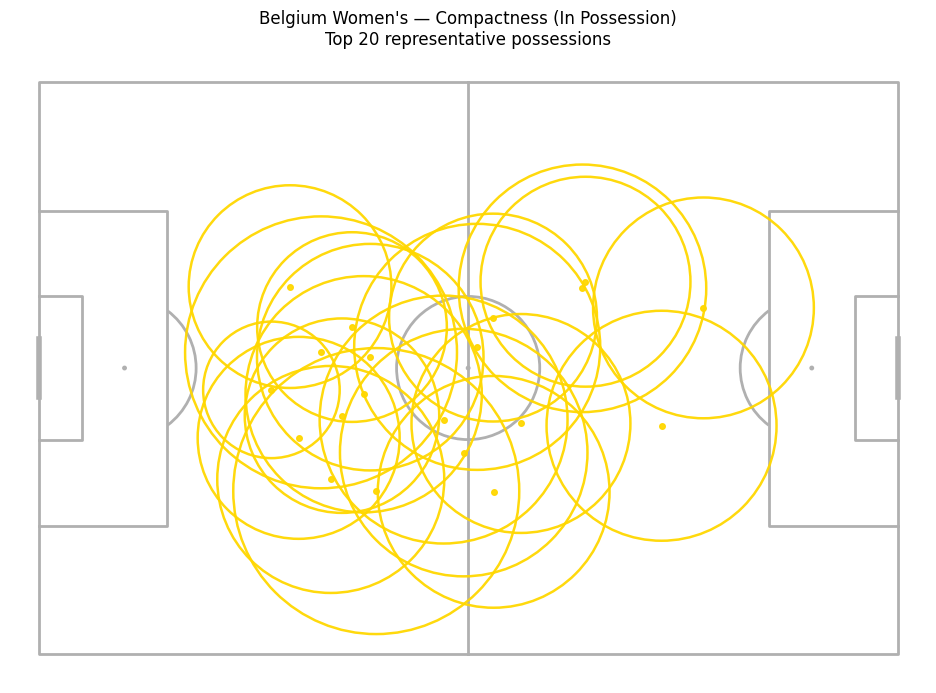

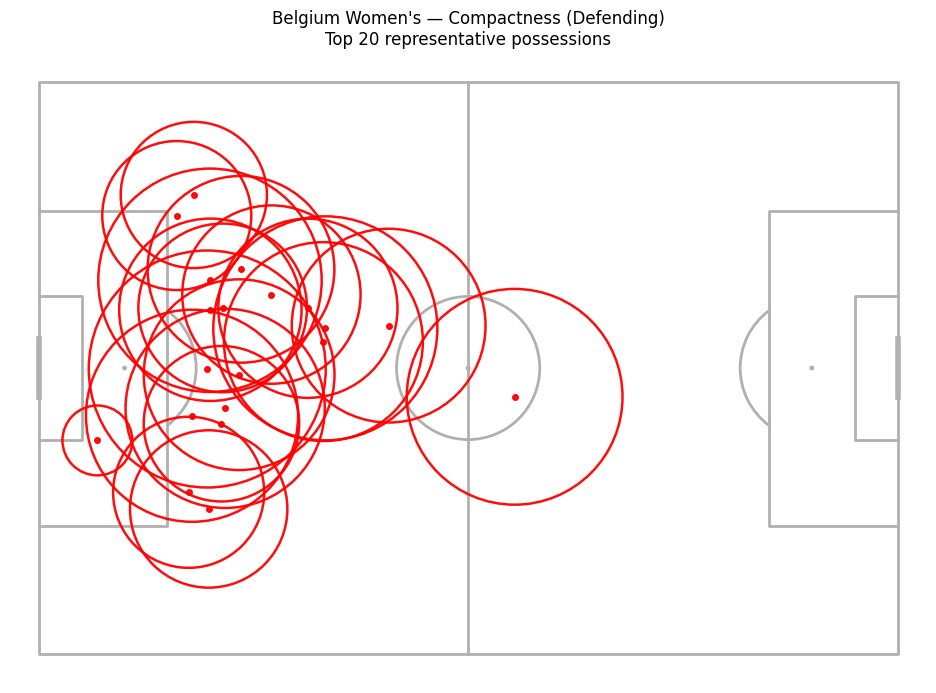

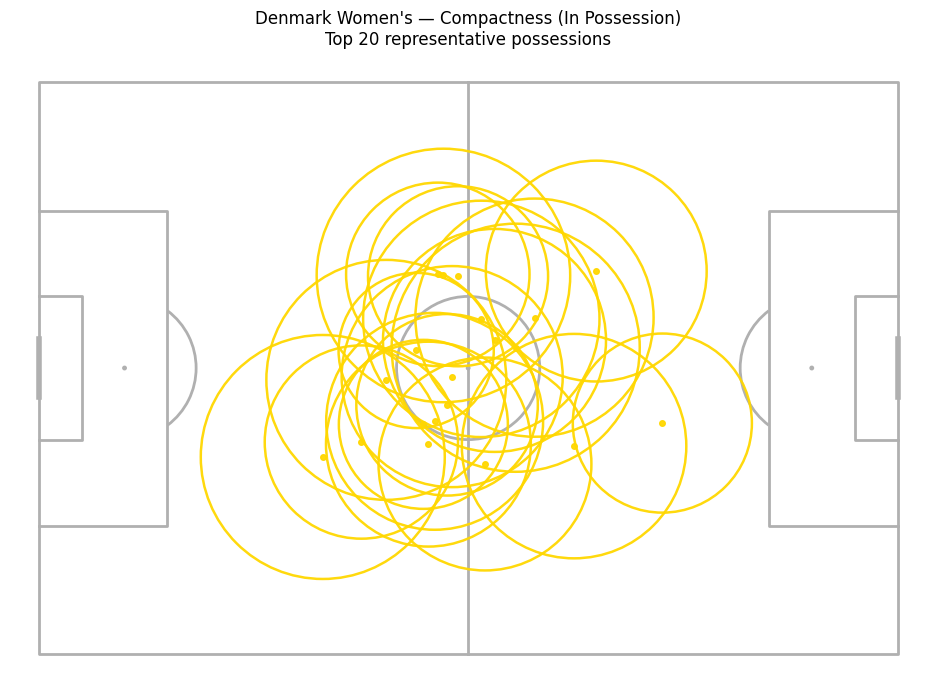

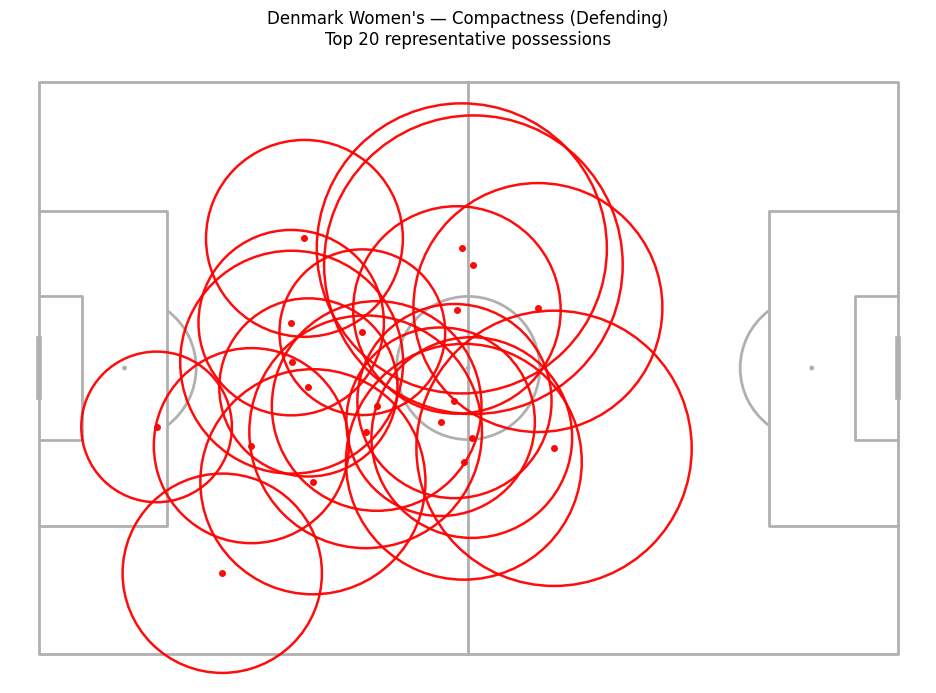

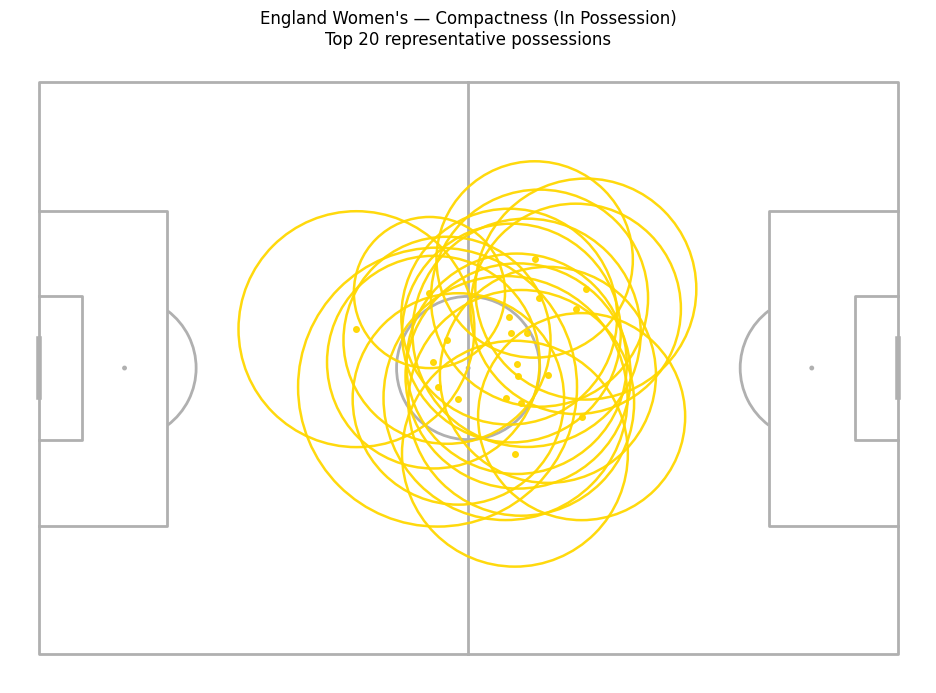

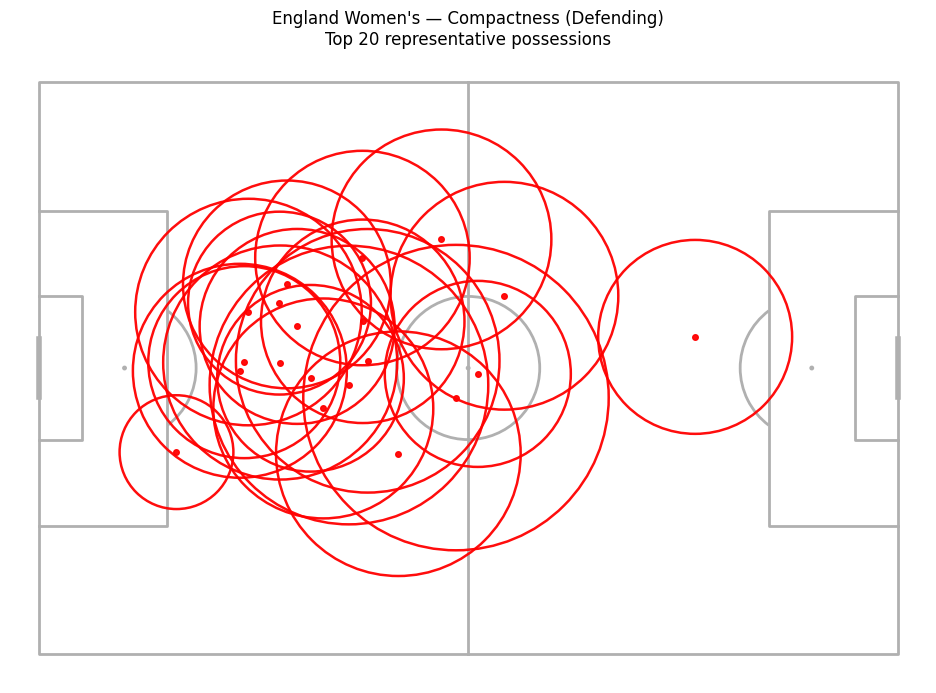

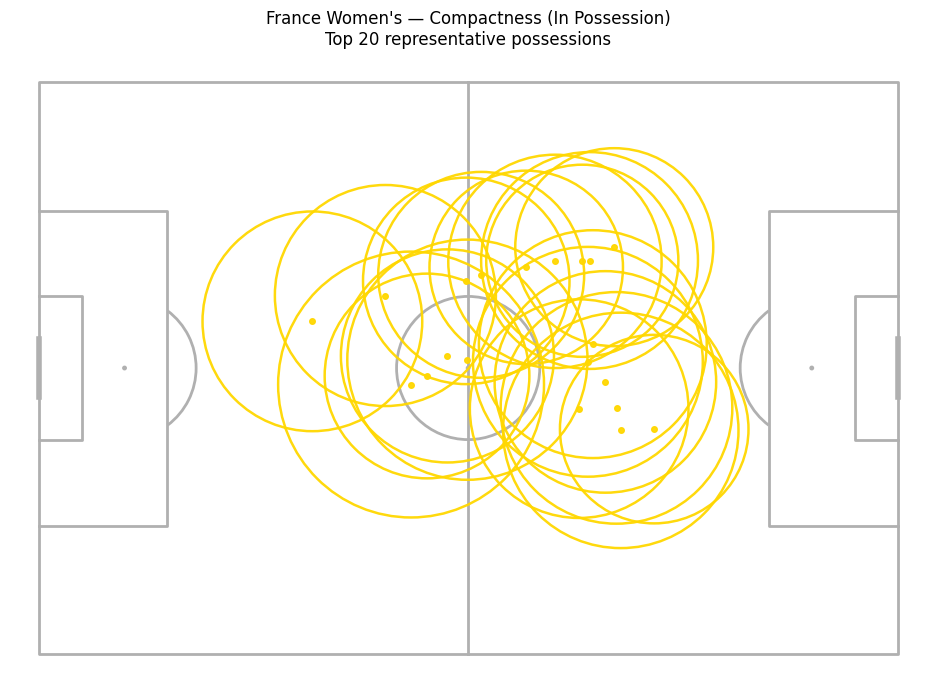

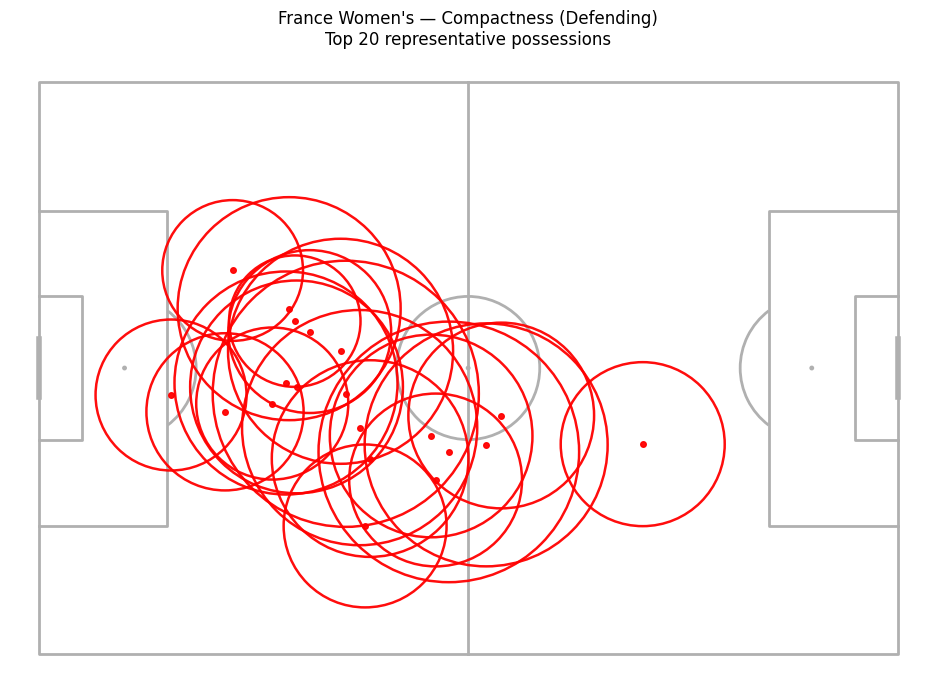

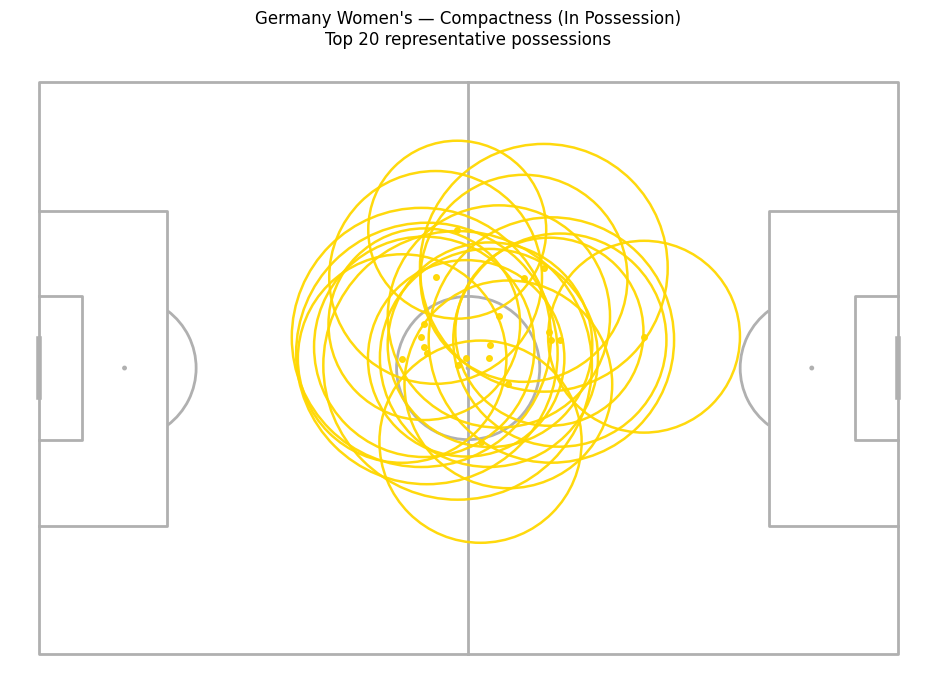

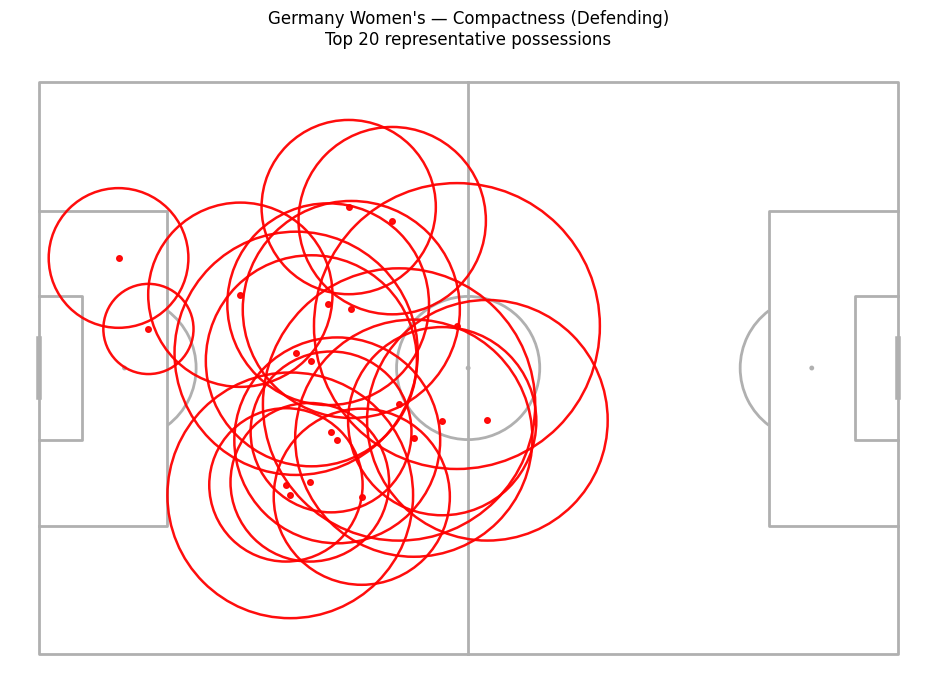

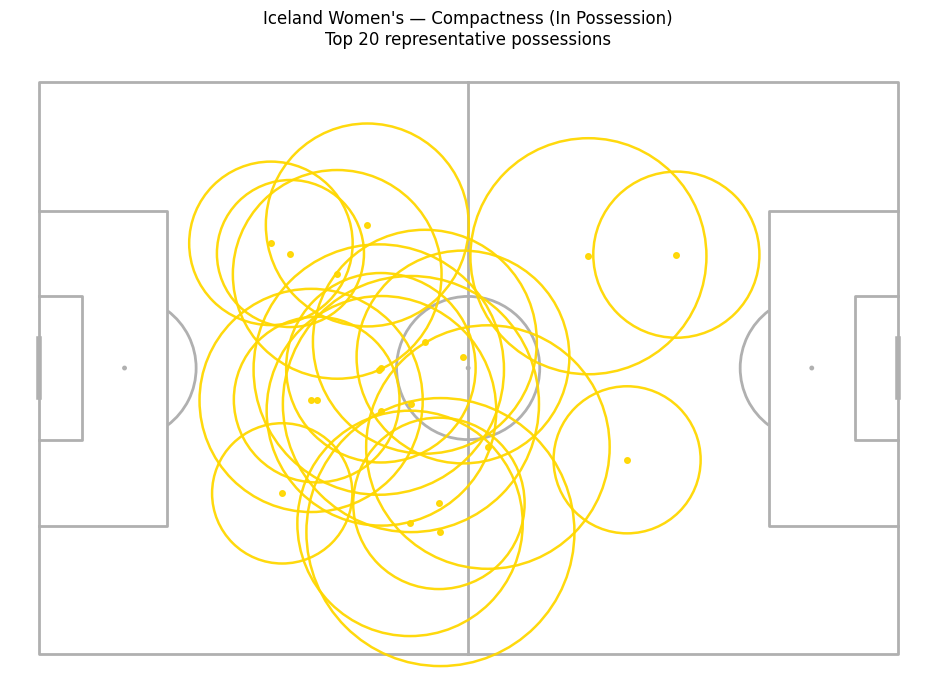

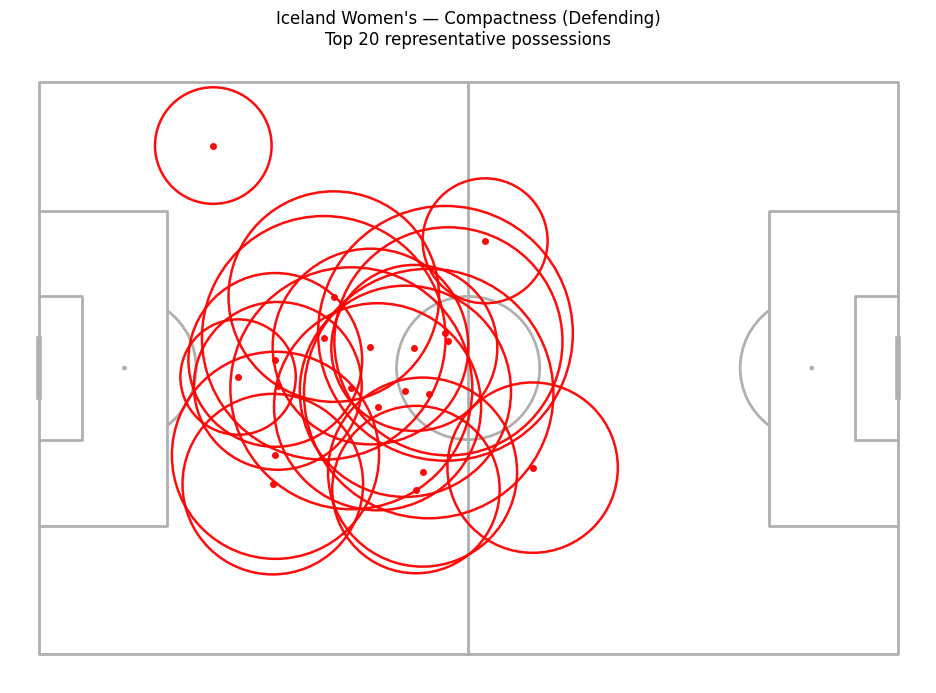

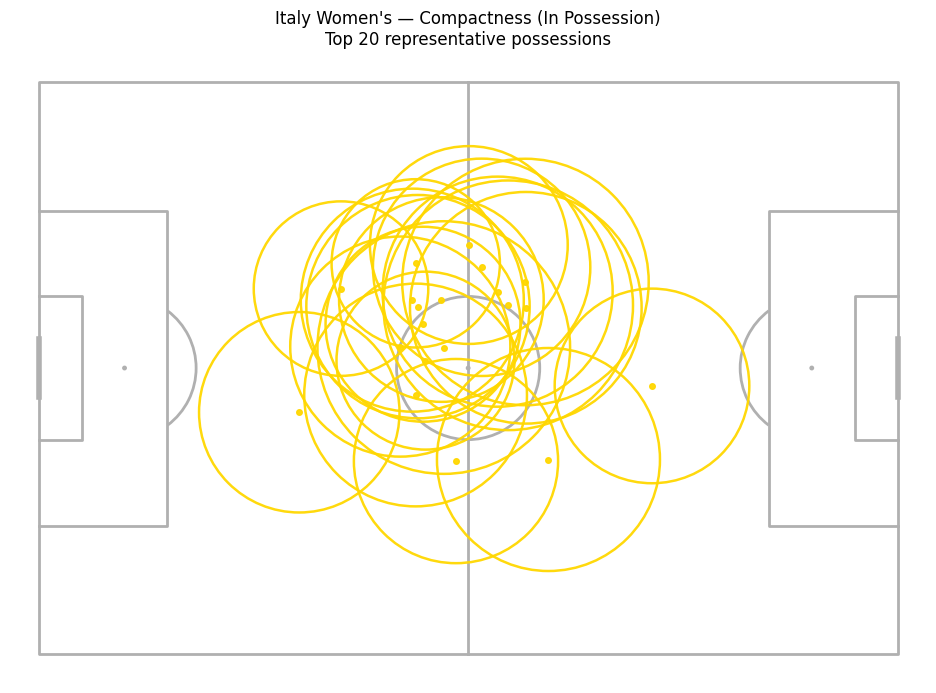

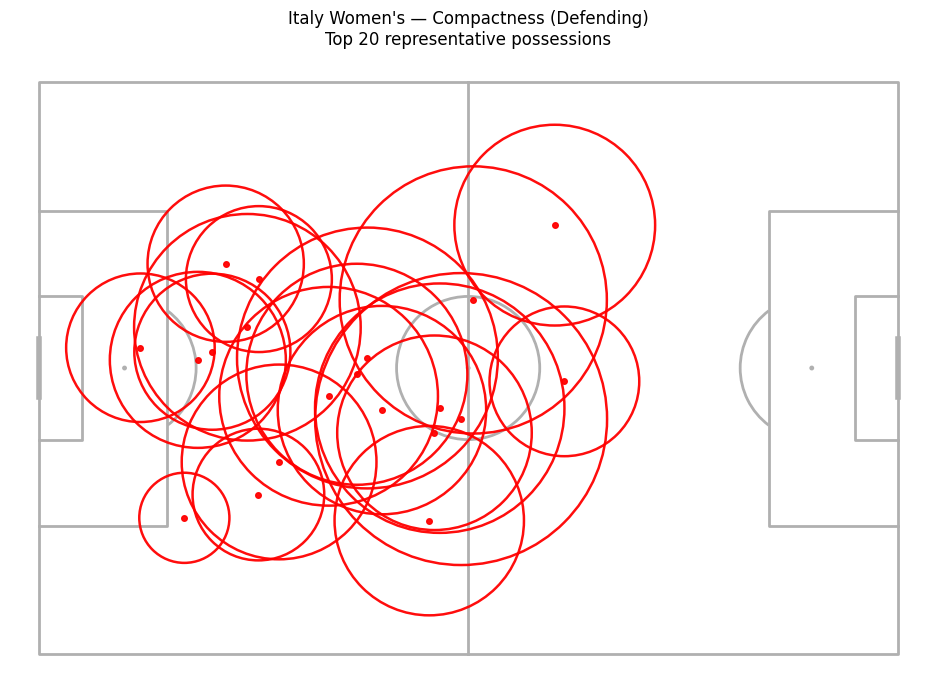

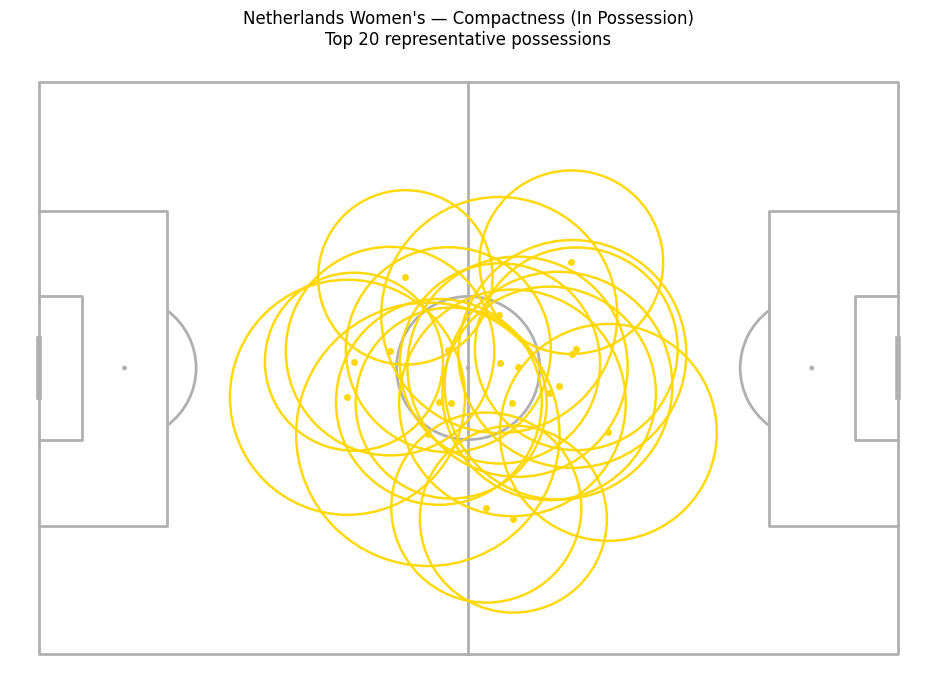

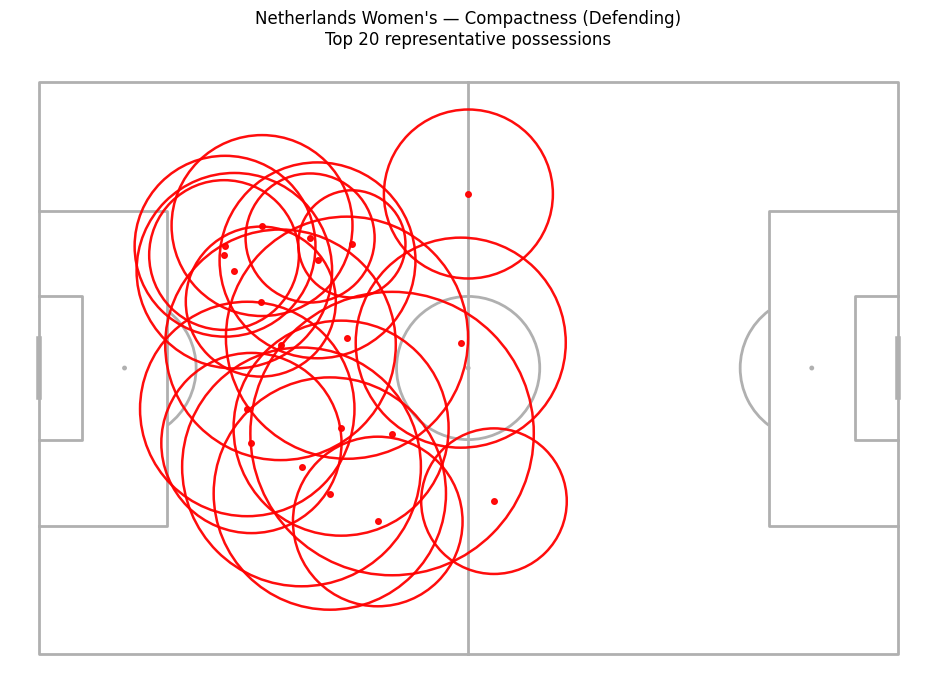

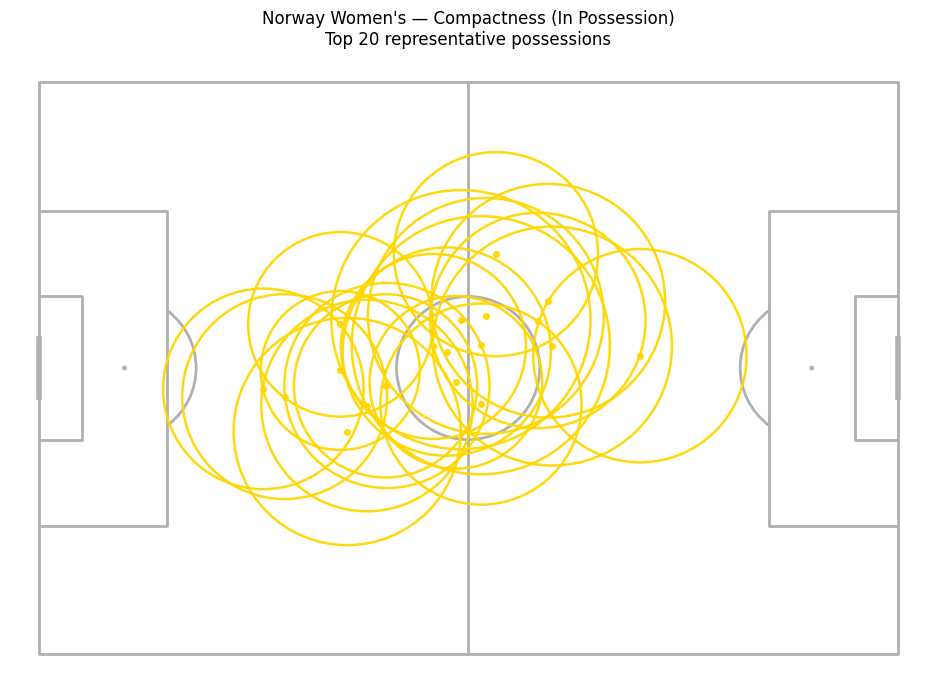

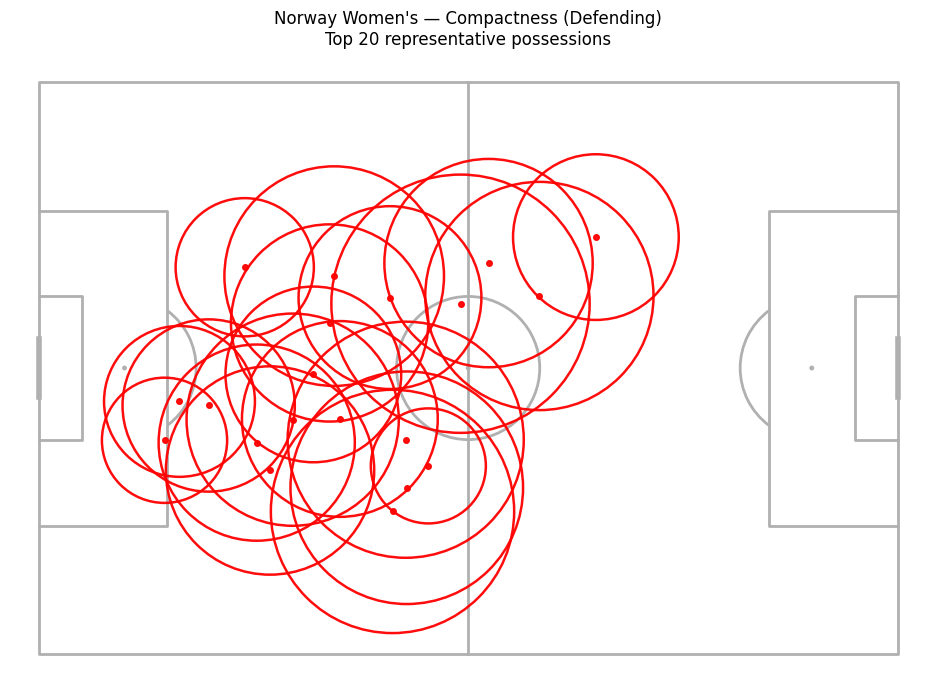

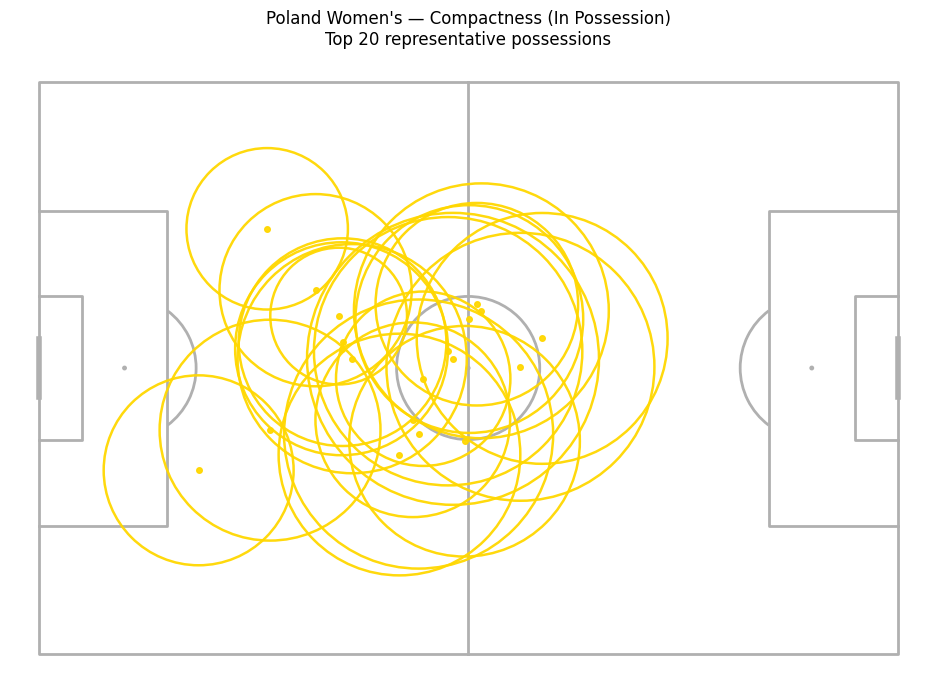

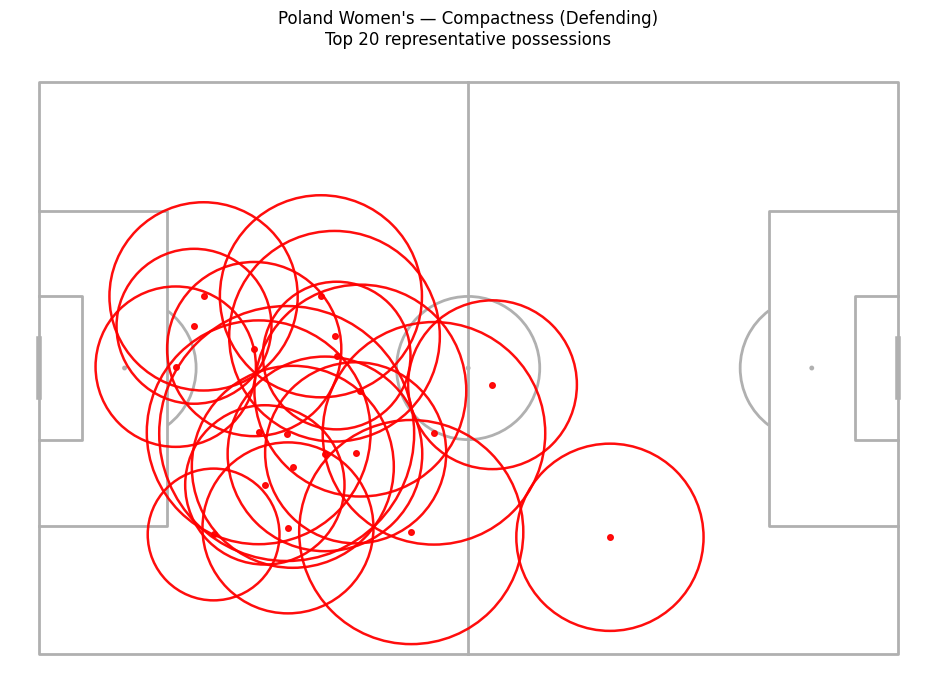

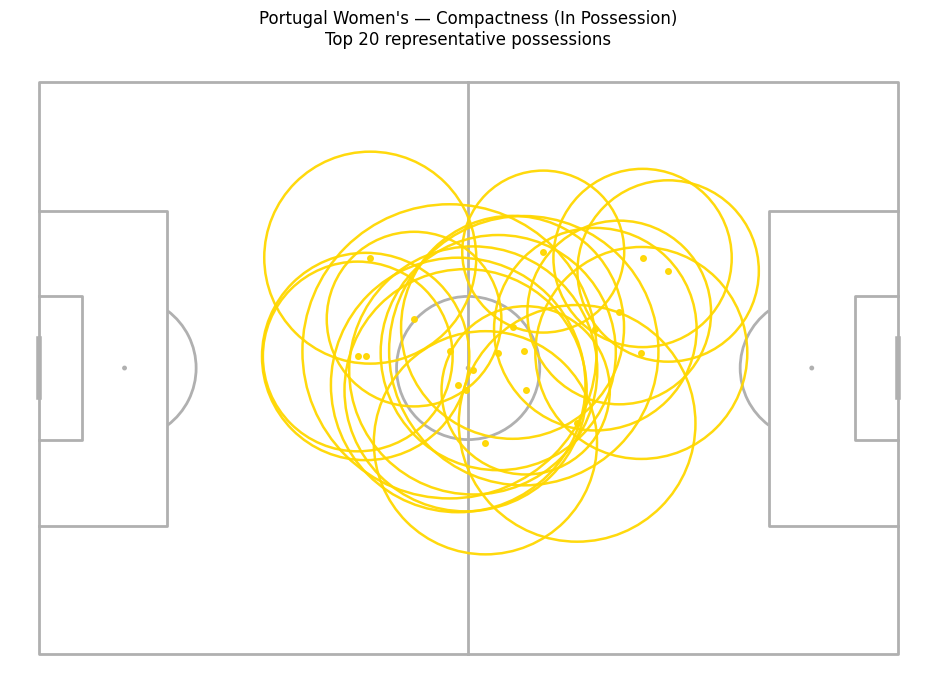

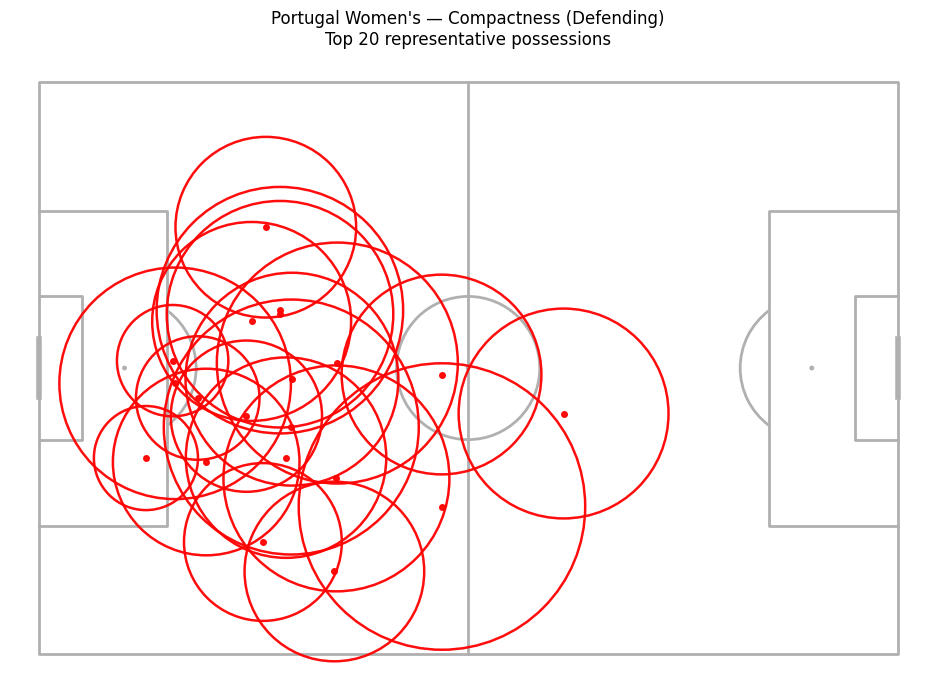

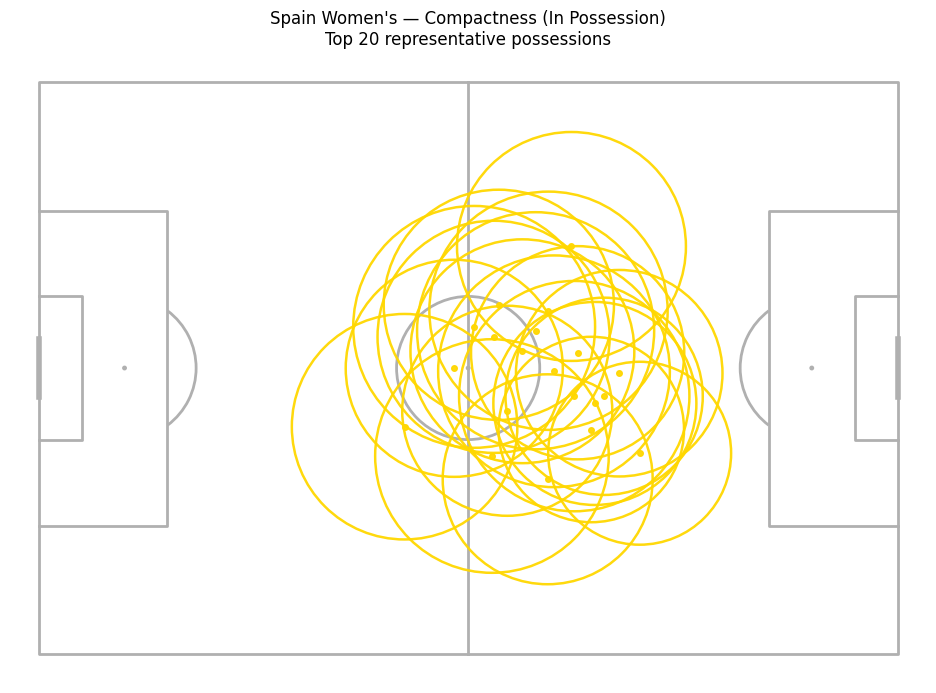

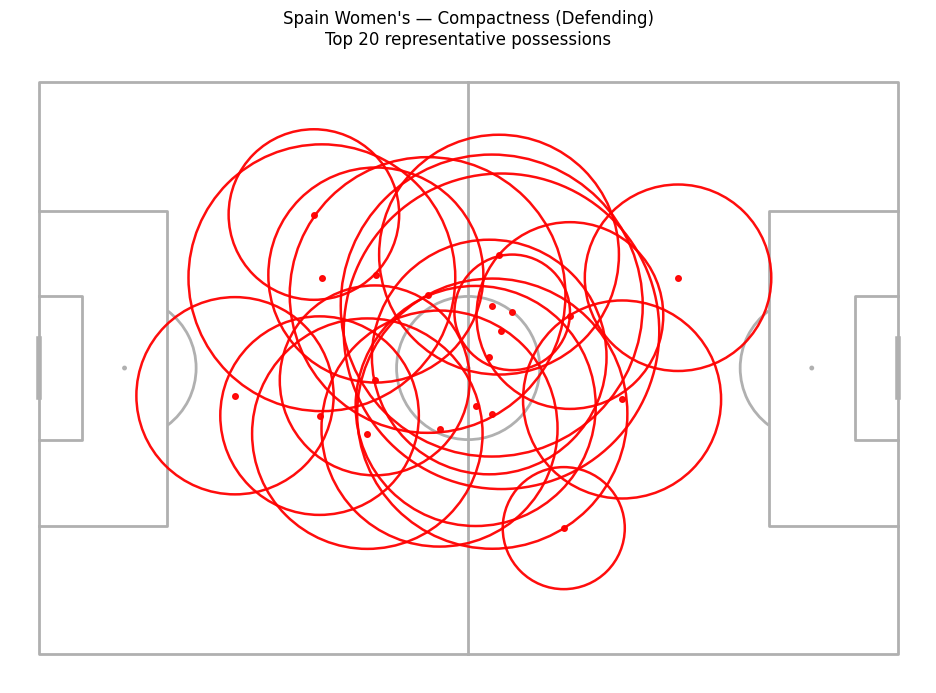

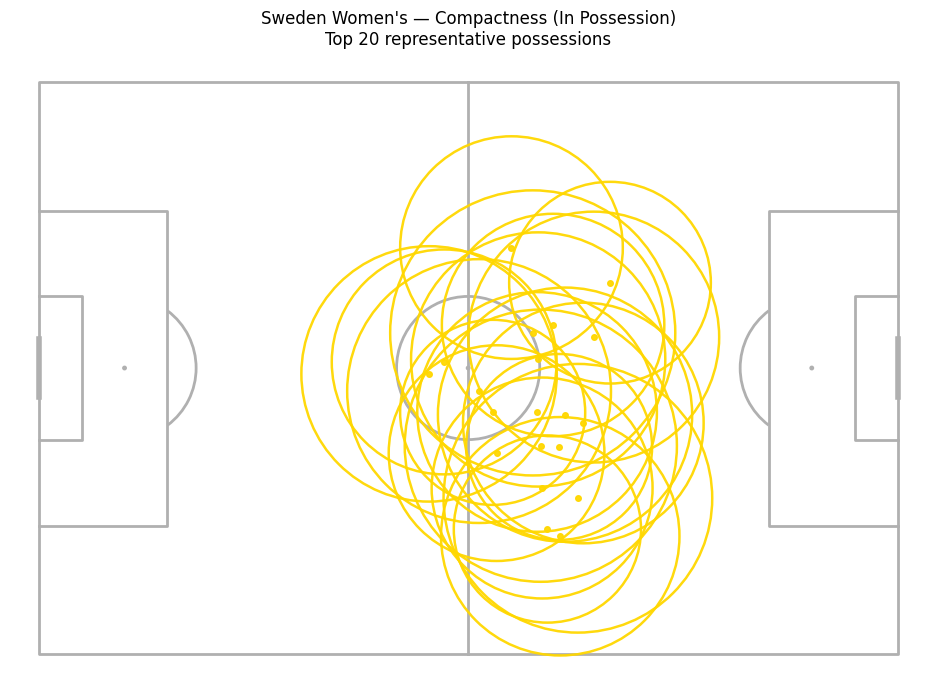

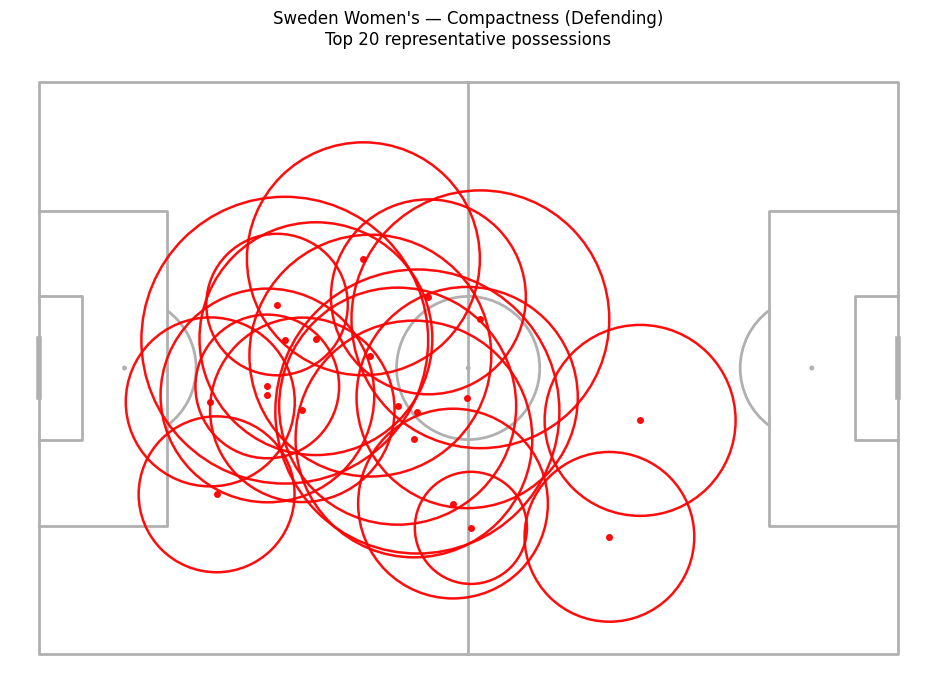

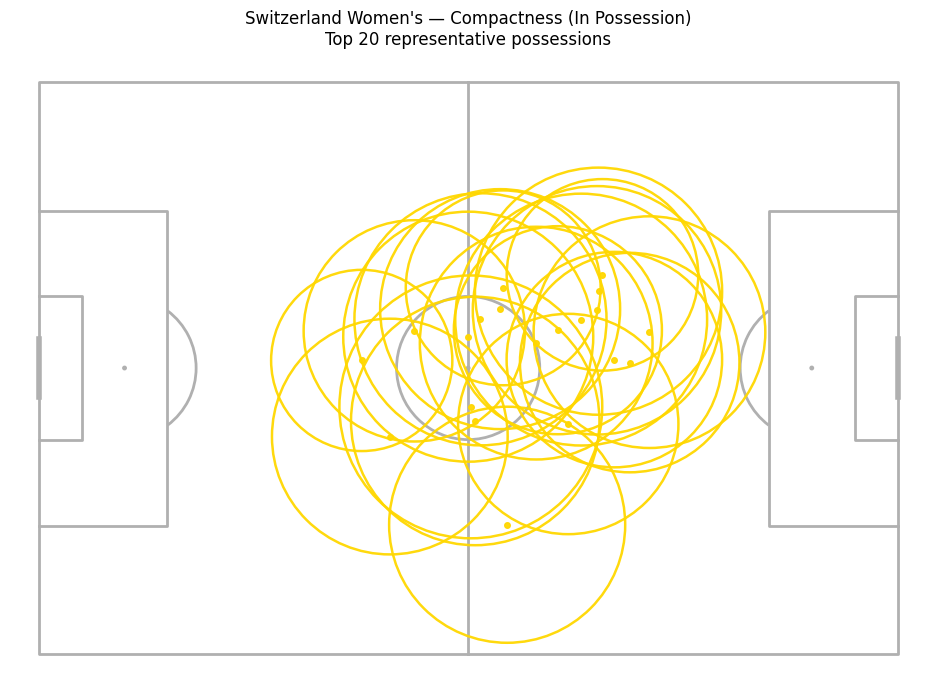

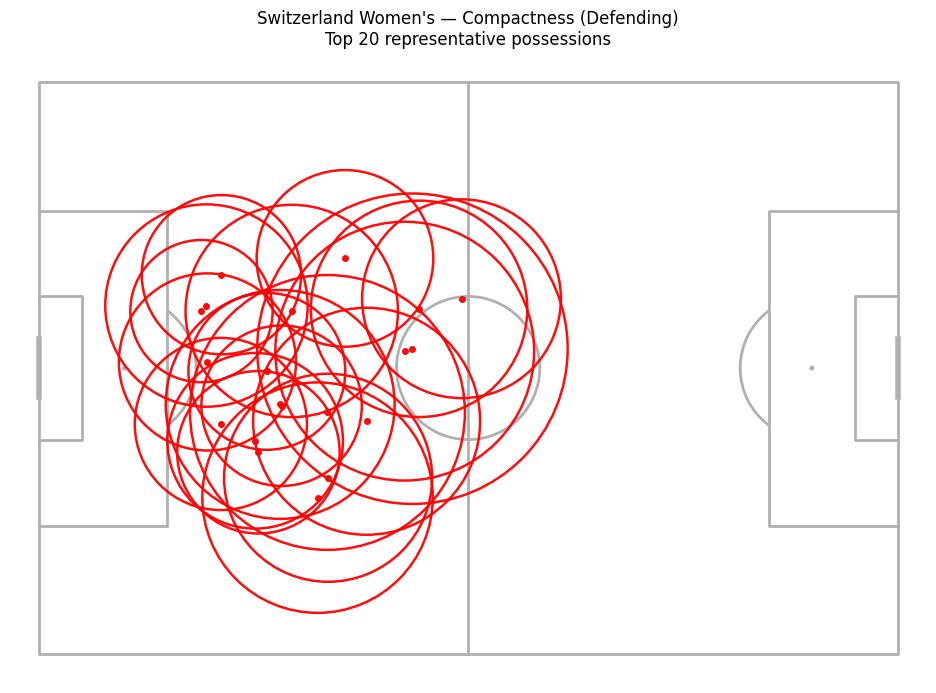

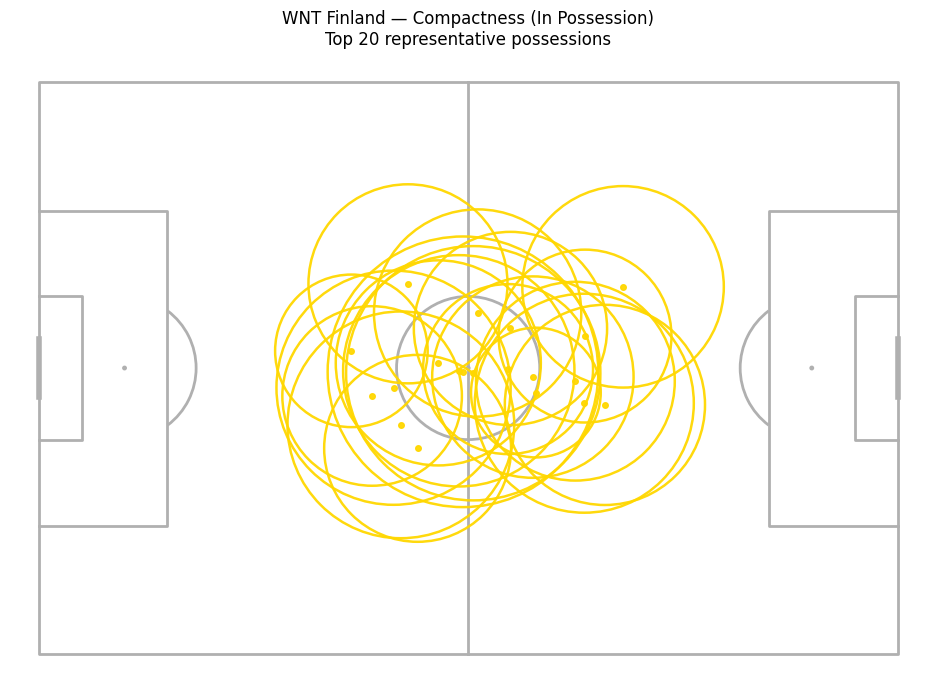

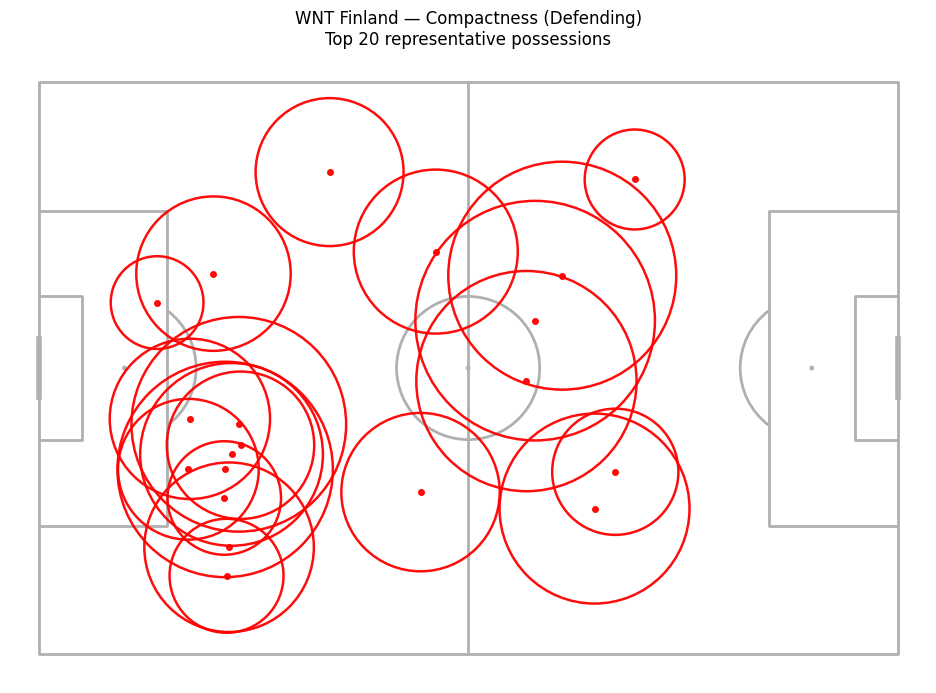

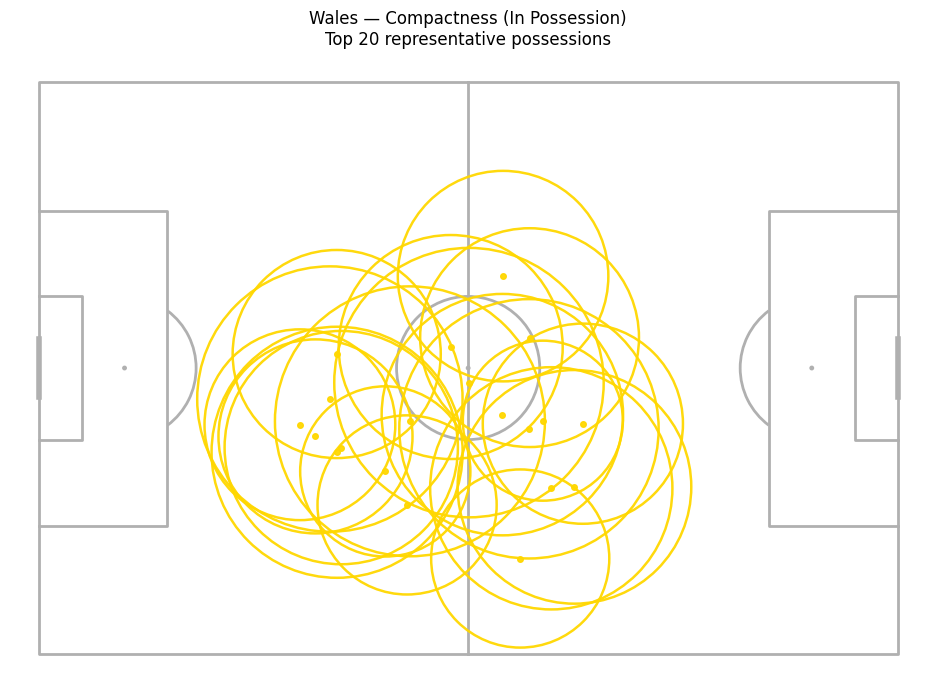

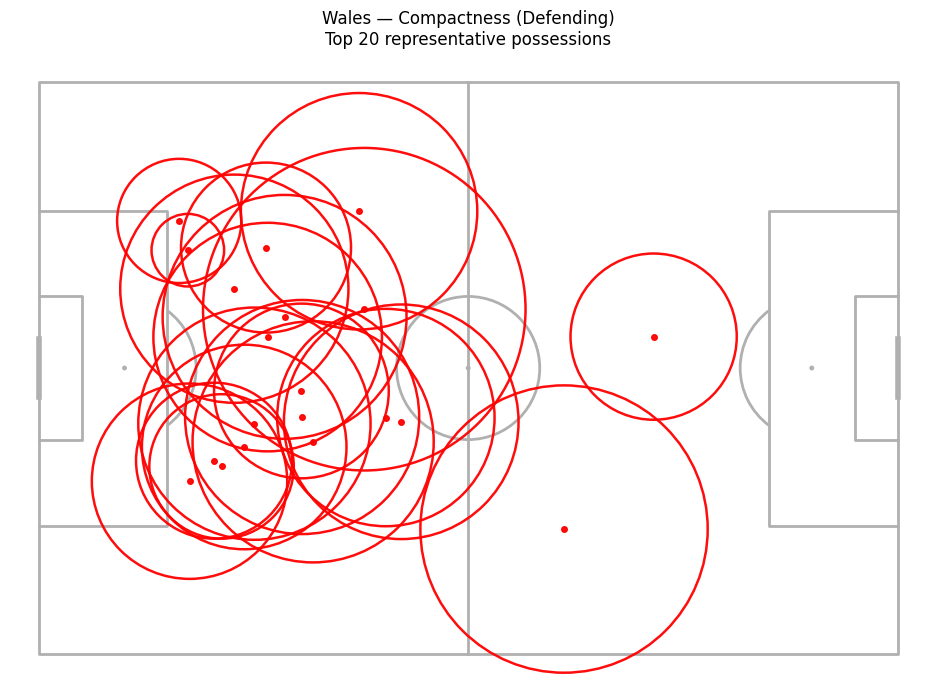

In [71]:
## Run the loop 
team_loop(compactness_clean)

# Overview

### The visualizations show each team's average positional shape during both attacking possessions and defensive moments out of possessions. Each dot represents the teams mean on-ball position during possession or out of possession. The circle visualizes the teams compactness radius, this is acheived by getting the standard deviation of player's respected x/y location. The smaller the circle the more compact shape the team is in. 

## Belgium's Example 

### In possession, Belgiums shape seems to be more wider and dispersed, covering almost the full width of the field, indicating a style of play that includes spreading the field and taking advantage of the wider spaces. While defending the circles are tighter and concentrated towards the defensive half. The visualization shows that Belgium prioritize a narrow defensive shape / organization. 

## Germany's Example 

### In possession 